In [9]:
import pandas as pd 
import numpy as np 
import pandas as pd
import matplotlib as mpl 
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import sys 
sys.path.append('../../modules')
import matplotlib_config as mconf
import leaf_model as lm
colorI, colorII, colorIII = mconf.set_standard_layout()

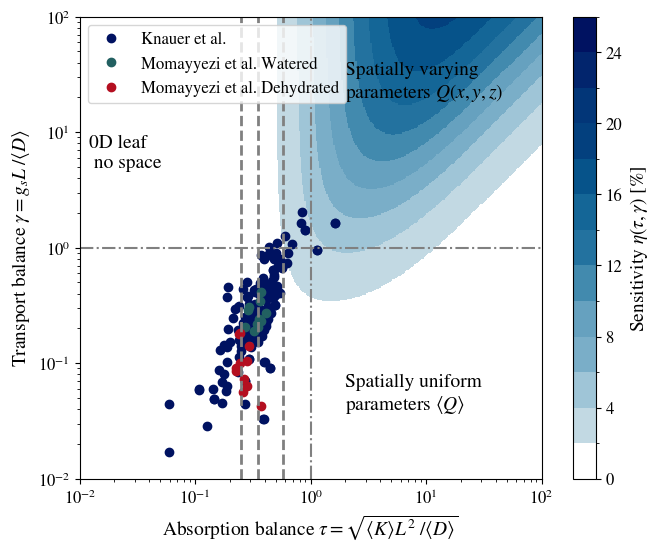

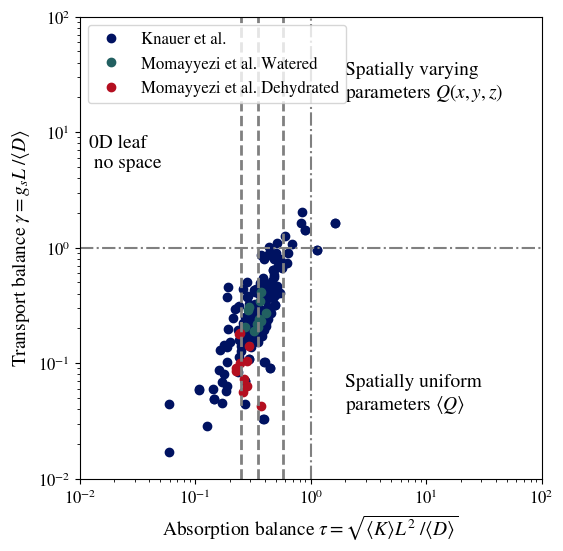

In [ ]:

def my_cmap(min, max, res):
    colors = ['#001261',
 '#02236C',
 '#023376',
 '#034481',
 '#06568C',
 '#156798',
 '#307DA6',
 '#4E92B4',
 '#71A8C4',
 '#94BED2',
 '#B3D1DF',
 '#D5E3E9'] #scicolor.get_cmap('oslo25').colors
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', colors, N=21).reversed()
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # force the first color entry to be 
    cmaplist[0] = 'white'
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'Custom cmap', cmaplist, cmap.N)

    # define the bins and normalize
    bounds = np.linspace(min, max, res)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    return cmap, norm

sensitivity = 100*np.loadtxt('../../data/saved_data/sensitivities.txt', delimiter=';', skiprows=1)
N = len(sensitivity)
taus   = np.exp(np.linspace(np.log(0.01), np.log(100), N))
gammas = np.exp(np.linspace(np.log(0.01), np.log(100), N))
bounds = (0, 26, 14)

# FULL PLOT

fig = plt.figure(figsize=(8,6))
cmap, norm = my_cmap(*bounds)
im = plt.pcolor(taus, gammas, sensitivity, shading='nearest', cmap=cmap, norm=norm)
cbar = plt.colorbar(im)
#
# load dfKnauer and dfMomayyezi to plot the data points
dfKnauer = pd.read_csv('../../data/saved_data/Knauer2022_hypostomatous.csv', sep=';', decimal=',') 
dfMomayyeziW = pd.read_csv('../../data/saved_data/Momayyezi2022_watered.csv', sep=';', decimal=',')
dfMomayyeziDH = pd.read_csv('../../data/saved_data/Momayyezi2022_dehydrated.csv', sep=';', decimal=',')

point_colors = [mconf.hex2rgb('001261'), mconf.hex2rgb('226061'), mconf.hex2rgb('B40F20')]


# plot data points 
for df, color, label in zip([dfKnauer, dfMomayyeziW, dfMomayyeziDH], point_colors, ['Knauer et al.', 'Momayyezi et al. Watered', 'Momayyezi et al. Dehydrated']):
    plt.plot(df['tau'], df['gamma'], 'o', color=color, label=label)

lines = [0.248, 0.352, 0.570] #1%, 2%, 5% relative error
for line in lines:
    plt.vlines(line, 0.01, 100, color='grey', linestyle='--', linewidth=2)

#  
plt.text(0.012, 5, '0D leaf \n no space', fontsize=14, color='black')
plt.text(2, 0.04, 'Spatially uniform \nparameters '+r'$\langle Q \rangle$', fontsize=14, color='black')
plt.text(2, 20, 'Spatially varying \nparameters '+r'$Q(x,y,z)$', fontsize=14, color='black')
#
cbar.set_label(r'Sensitivity $\eta(\tau, \gamma)$ [%]')
plt.xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 \; / \langle D\rangle}$')
plt.ylabel(r'Transport balance $\gamma = g_s L \; / \langle D \rangle$')
plt.hlines(1, 0.01, 100, color='grey', linestyle='-.')
plt.vlines(1, 0.01, 100, color='grey', linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01, 100)
plt.ylim(0.01, 100)
plt.legend(loc='upper left', fontsize=12)
plt.gca().set_aspect('equal')
plt.savefig(f'../vectorgraphics/figure3C.svg')
plt.show()

# PLOT WITHOUT HEATMAP (ease of rendering in graphics tools like Adobe Illustrator or Inkscape)

fig = plt.figure(figsize=(8,6))

# plot data points 
for df, color, label in zip([dfKnauer, dfMomayyeziW, dfMomayyeziDH], point_colors, ['Knauer et al.', 'Momayyezi et al. Watered', 'Momayyezi et al. Dehydrated']):
    plt.plot(df['tau'], df['gamma'], 'o', color=color, label=label)

lines = [0.248, 0.352, 0.570] #1%, 2%, 5% relative error
for line in lines:
    plt.vlines(line, 0.01, 100, color='grey', linestyle='--', linewidth=2)

#  
plt.text(0.012, 5, '0D leaf \n no space', fontsize=14, color='black')
plt.text(2, 0.04, 'Spatially uniform \nparameters '+r'$\langle Q \rangle$', fontsize=14, color='black')
plt.text(2, 20, 'Spatially varying \nparameters '+r'$Q(x,y,z)$', fontsize=14, color='black')
#
plt.xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 \; / \langle D\rangle}$')
plt.ylabel(r'Transport balance $\gamma = g_s L \; / \langle D \rangle$')
plt.hlines(1, 0.01, 100, color='grey', linestyle='-.')
plt.vlines(1, 0.01, 100, color='grey', linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01, 100)
plt.ylim(0.01, 100)
plt.legend(loc='upper left', fontsize=12)
plt.gca().set_aspect('equal')
plt.savefig(f'../vectorgraphics/figure3C_empty.svg')
plt.show()

### Generate a histogram of the $A_N$ distribution illustrating how $\eta$ is calculated

MF solution has draw-down of 0.388


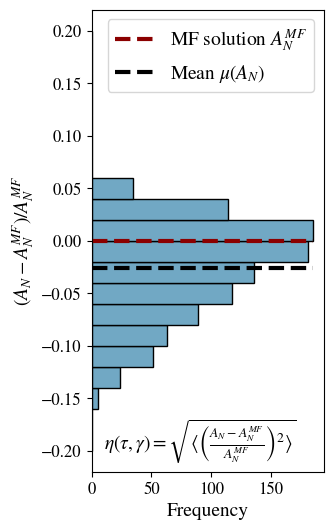

In [ ]:

tau, gamma, chi_ = 1.65, 2.02, 0.10
n = 10
delta_min, kappa_min, lambda_min = 0.2, 0.2, 0.2

leaf = lm.Leaf(tau, gamma, chi_, rho=(1,1,0.5), resolution=100)
domain, mf_solution = leaf.calculate_steady_state_solution()
mf_dd = 1 - mf_solution[0]

rho_deltas  = np.linspace(delta_min, 1, n)
rho_kappas  = np.linspace(kappa_min, 1, n)
rho_lambdas = np.linspace(lambda_min, 1-lambda_min, n)

drawdown = np.zeros(n**3)
index = 0
for k in range(n):
    for l in range(n):
        for m in range(n):
            rho = (rho_deltas[k], rho_kappas[l], rho_lambdas[m])
            leaf.rho = rho
            domain, solution = leaf.calculate_steady_state_solution()
            drawdown[index] = 1 - solution[0]
            index += 1

mean = np.mean(drawdown)
std = np.std(drawdown)


fig, ax = plt.subplots(figsize=(3,6))

bins = 20
xmax, xmin = 0.20, -0.20
counts = ax.hist((drawdown-mf_dd)/mf_dd, bins=bins, range=(xmin, xmax), orientation='horizontal', align='mid', color=mconf.hex2rgb('71A8C4'), edgecolor='black')
height = np.max(counts[0])
ax.plot([0, height], [0, 0], color='darkred', linestyle='--', linewidth=3, label=r'MF solution $A_N^{MF}$')
ax.plot([0, height], [(mean-mf_dd)/mf_dd, (mean-mf_dd)/mf_dd], 'k--', linewidth=3, label=r'Mean $\mu(A_N)$')
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('($A_N - A_N^{MF}$)/$A_N^{MF}$', fontsize=14) 
ax.text(10, -0.20, r'$\eta(\tau, \gamma) = \sqrt{\langle \left( \frac{A_N - A_N^{MF}}{A_N^{MF}} \right)^2 \rangle}$', fontsize=14)
ax.legend()
plt.savefig('../vectorgraphics/figure3B.svg')
plt.show()


### Generate a 3-col figure of varying different structural parameters $\rho$

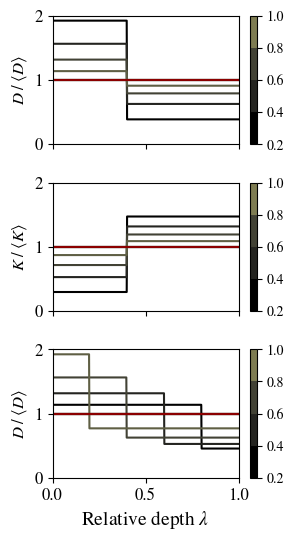

In [ ]:

def kappa_delta(rho_delta, rho_kappa, rho_lambda, resolution=500):
    domain = np.linspace(0, 1, resolution)
    deltas = np.zeros(resolution)
    kappas = np.zeros(resolution)
    # finding percentage volumes occupied by the different comparments
    boundary = int(resolution*(1-rho_lambda))
    # calculate dimensionless scalars
    delta_sm = 1/((1-rho_lambda) + rho_lambda*rho_delta)
    delta_pm = rho_delta*delta_sm
    #
    kappa_pm = 1/((1-rho_lambda)*rho_kappa + rho_lambda)
    kappa_sm = rho_kappa*kappa_pm
    # fill in arrays
    deltas[:boundary] = delta_sm
    deltas[boundary:] = delta_pm
    #
    kappas[:boundary] = kappa_sm 
    kappas[boundary:] = kappa_pm
    return domain, deltas, kappas
    


fig, axs = plt.subplots(3, 1, figsize=(3,6), sharex=True, sharey=True)
axs = axs.flatten()
lines = 4
rhos = np.linspace(0.2, 0.8, lines)

# THESE CHOICES ARE CONSISTENT WITH THE SENSITIVITY SEARCH AND An HISTOGRAM
vary_delta = np.ones((lines, 3))
vary_delta[:,0] = rhos
vary_delta[:,2] = 0.6

vary_kappa = np.ones((lines, 3))
vary_kappa[:,1] = rhos
vary_kappa[:,2] = 0.6

vary_lambda = np.ones((lines, 3))
vary_lambda[:,0] = 0.4
vary_lambda[:,1] = 1
vary_lambda[:,2] = rhos

variations = [vary_delta, vary_kappa, vary_lambda]
ylabels = [r'$D \;/\; \langle D\rangle$', r'$K \;/\; \langle K\rangle$', r'$D \;/\; \langle D\rangle$']

##colors = ['#001261', '#023376','#06568C', '#307DA6', '#71A8C4']
colors = ['#000000',
 '#242420',
 '#424235',
 '#5F5F44',
 '#7E7C52']

for ax, variation, ylabel in zip(axs, variations, ylabels):
    for rho, color in zip(variation, colors):
        domain, deltas, kappas = kappa_delta(*rho)
        ax.plot(domain, deltas, color=color)
        ax.plot(domain, kappas, color=color)
    ax.plot(domain, np.ones_like(domain), color='darkred', linestyle='-', linewidth=1.5)
    ax.set_ylabel(ylabel, fontsize=12)
axs[2].set_xlabel(r'Relative depth $\lambda$', fontsize=14)


for ax in axs:
    bounds = np.linspace(0.2, 1, lines+1)
    # Create a discrete colormap using the same colors as used for the lines
    discrete_cmap = ListedColormap(colors)
    # Create a norm that maps values to the correct color bin
    norm = BoundaryNorm(bounds, discrete_cmap.N)
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=discrete_cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.05, boundaries=bounds, ticks=bounds)
    #cbar.set_label(r'$\tau$ values', fontsize=fontsize, labelpad=1)
    cbar.ax.tick_params(labelsize=10)

domain, deltas, kappas = kappa_delta(1, 1, 0.5)
axs[2].plot(domain, deltas, color='darkred', label=r'Typical profile')

plt.subplots_adjust(hspace=0.3)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.savefig('../vectorgraphics/figure3A.svg')
plt.show()
